# <div style = 'background-color:skyblue'> <center> 2nd_Mini_Project_Classifier </div>

# Problem Statement

__Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing various houses into different grades based on various parameters. This would help agents in identifying the type of house a customer is looking for. This way, the search for the house can be narrowed down by focusing only on the ‘condition of the house’.__

__The Grade (condition of the house that ranges from A (Best) – E (Worst) ) can also be used by existing owners to list their properties for sale. Grading helps them in arriving at a price of the house.__

## Import The Important libraries --

In [133]:
import numpy as np                                     # Used for Mathematical calculations
import pandas as pd                                    # Used for dealing with DataFrame 
import matplotlib.pyplot as plt                        # Used for data Visualization
import seaborn as sb                                   # Used for Advanced Data Visualization
from tabulate import tabulate                          # Used for create tables 
import warnings                                        # Used for ignore Warnings 
warnings.filterwarnings("ignore")
                                                   
from sklearn import preprocessing                      # Used for preprocessing        

from sklearn.preprocessing import MinMaxScaler         # Used for Scaling the data 
from sklearn.model_selection import train_test_split   # Used for spliting the dataset into Training and testing
from sklearn.model_selection import cross_val_score    # Used for Cross validation
from sklearn.model_selection import RepeatedStratifiedKFold  

from sklearn.naive_bayes import GaussianNB             # used for Gaussian naive Bayes Classifier model Building
from sklearn.tree import DecisionTreeClassifier        # used for Decision Tree Classifier model Building
from sklearn.ensemble import RandomForestClassifier    # Used for Random Forest Classifier model Building
from sklearn import neighbors                          # Used for KNN Classifier model Building

from sklearn.metrics import confusion_matrix           # Used for calculating true Positive and True Negative Classes
from sklearn.metrics import recall_score               # Used to calculate recall Score 
from sklearn.metrics import f1_score                   # Used to calculate f1_score Score 
from sklearn.metrics import accuracy_score             # Used to calculate accuracy_score Score 
from sklearn.metrics import precision_score            # Used to calculate precision_score Score 

## Reading The dataset --

In [134]:
df=pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


## Preprocessing --

In [135]:
df.shape                                               # Check the Structure of the data 

(3000, 14)

(3000, 14)

In [136]:
df.columns                                             # Check the Column names in the dataframe 

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [137]:
df.dtypes                                              # Check the data types features

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [138]:
cat=df.select_dtypes(include="object")                 #  Tacking only categorical columns 
num=df.select_dtypes(exclude="object")                 # tacking only numerical columns 

In [139]:
a=list(cat.columns)                                    # Creating List of the categorical columns
b=list(num.columns)                                    # Creating list of the numerical columns 

### Tabular format of Categorical and numerical Features

In [140]:
print(tabulate({"categorical":a,"numerical":b},headers=["Categorical","Numerical"]))

Categorical    Numerical
-------------  --------------
roof           Id
Grade          Area(total)
               Trooms
               Nbedrooms
               Nbwashrooms
               Twashrooms
               Roof(Area)
               Lawn(Area)
               Nfloors
               API
               ANB
               Expected price
Categorical    Numerical
-------------  --------------
roof           Id
Grade          Area(total)
               Trooms
               Nbedrooms
               Nbwashrooms
               Twashrooms
               Roof(Area)
               Lawn(Area)
               Nfloors
               API
               ANB
               Expected price


In [141]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [142]:
for i in df.columns:                                   # Finding all unique values in each Features and their Counts 
    print(i)
    print(df[i].value_counts())

Id
1       1
2004    1
1995    1
1996    1
1997    1
       ..
1003    1
1004    1
1005    1
1006    1
3000    1
Name: Id, Length: 3000, dtype: int64
Area(total)
344    55
308    54
349    54
292    53
360    52
       ..
297    33
358    32
294    32
336    32
352    31
Name: Area(total), Length: 71, dtype: int64
Trooms
9    641
6    634
7    586
5    574
8    565
Name: Trooms, dtype: int64
Nbedrooms
4    623
5    600
6    573
3    410
7    393
8    226
2    175
Name: Nbedrooms, dtype: int64
Nbwashrooms
4    590
5    584
3    550
6    475
7    310
2    288
8    116
1     87
Name: Nbwashrooms, dtype: int64
Twashrooms
5     585
6     580
7     532
4     407
8     398
9     208
3     183
10     57
2      50
Name: Twashrooms, dtype: int64
roof
YES    1543
NO     1457
Name: roof, dtype: int64
Roof(Area)
0      1457
116      42
87       40
96       39
82       39
90       36
104      36
79       36
77       36
93       36
118      35
98       35
70       34
88       34
97       34
106      

In [143]:
df.isnull().sum()                                      # Check for null values

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

### <font color=crimson > There is no null values present in this dataset .

## Data Vizualization --

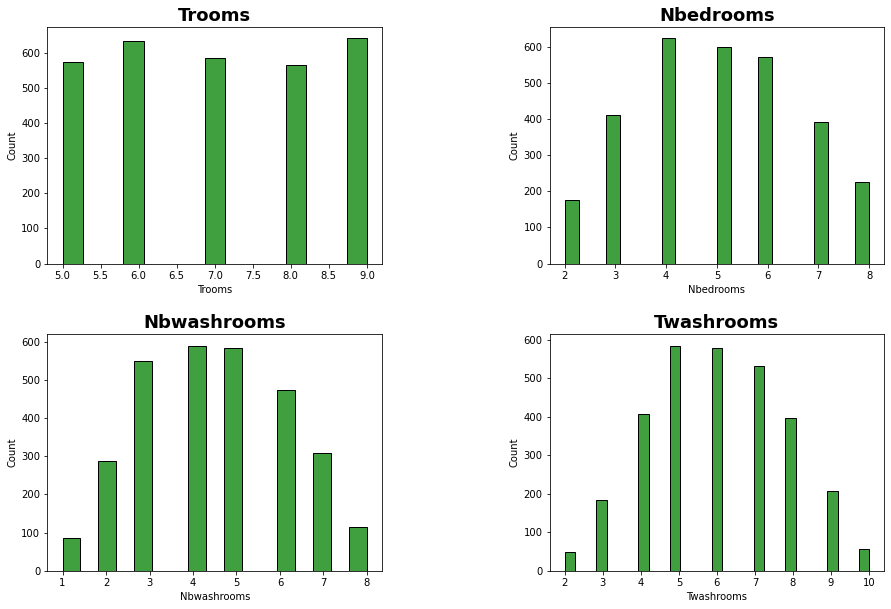

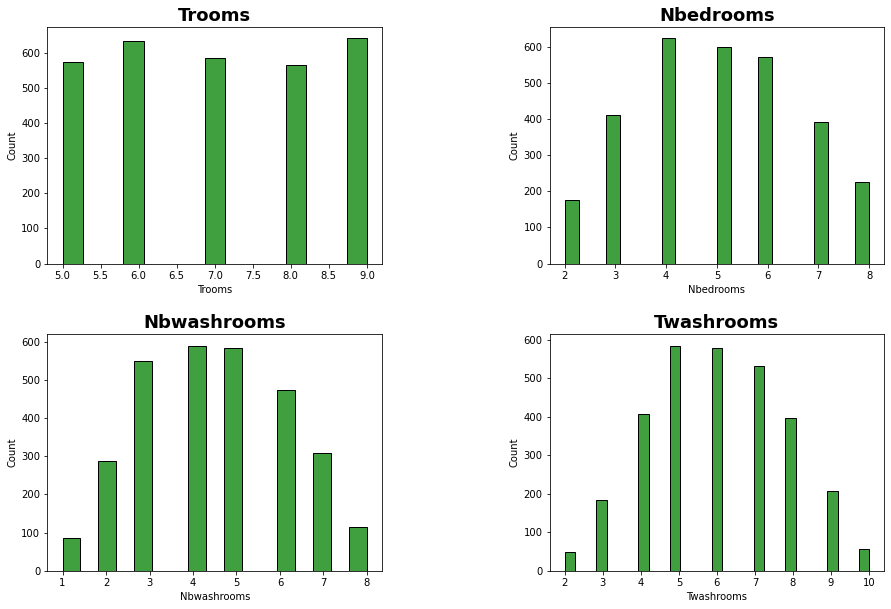

In [144]:
plt.figure(figsize =(15, 10))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.title("Trooms",fontsize=18,fontweight="bold")
sb.histplot(df.Trooms,color="green")

plt.subplot(2,2,2)
plt.title("Nbedrooms",fontsize=18,fontweight="bold")
sb.histplot(df.Nbedrooms,color="green")

plt.subplot(2,2,3)
plt.title("Nbwashrooms",fontsize=18,fontweight="bold")
sb.histplot(df.Nbwashrooms,color="green")

plt.subplot(2,2,4)
plt.title("Twashrooms",fontsize=18,fontweight="bold")
sb.histplot(df.Twashrooms,color="green")


plt.show()

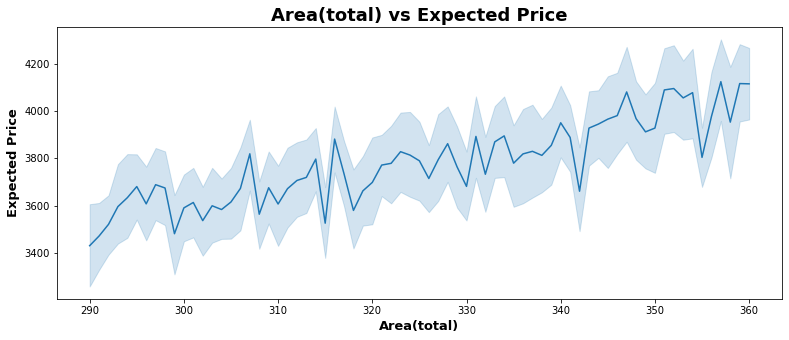

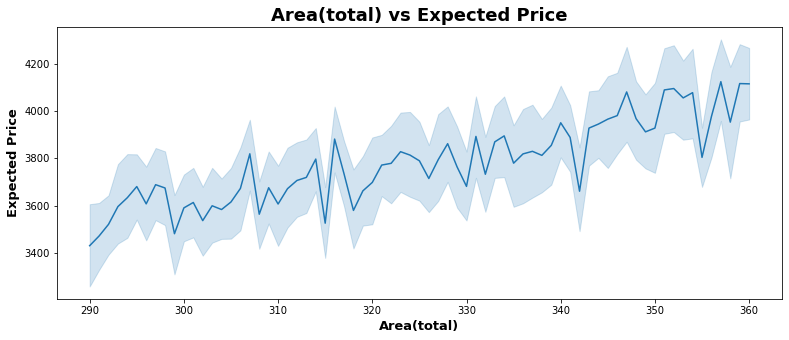

In [145]:
plt.figure(figsize=(13,5))
sb.lineplot(x=df["Area(total)"],y=df["Expected price"])
plt.title("Area(total) vs Expected Price",fontsize=18,fontweight="bold")
plt.xlabel("Area(total)",fontsize=13,fontweight="bold")
plt.ylabel("Expected Price",fontsize=13,fontweight="bold")
plt.show()

## <font color=crimson > Interpretation:
### <font color=navy > After visualize that graph We can Interpret that When the Area is increase then the Expected price is also increase.

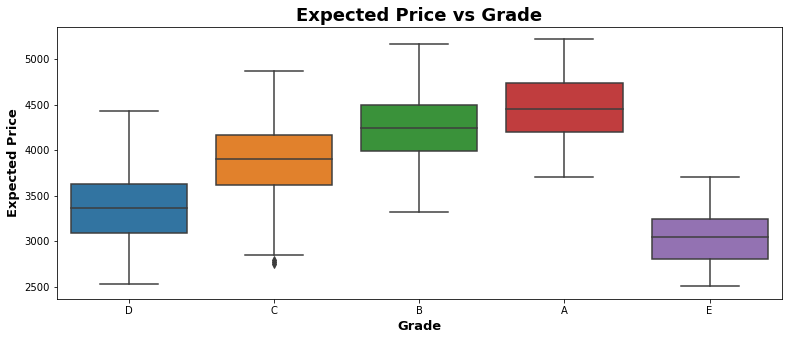

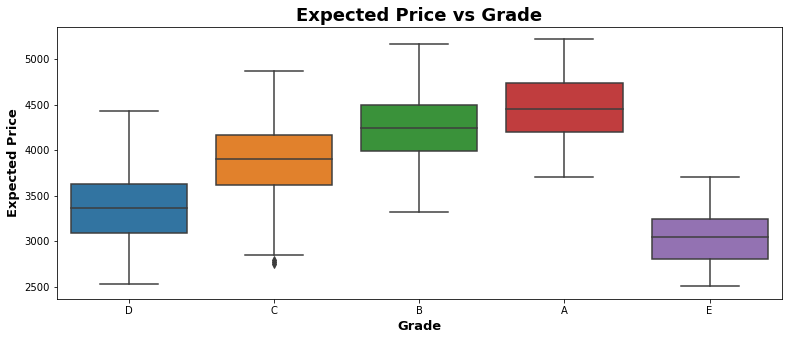

In [146]:
plt.figure(figsize=(13,5))
sb.boxplot(x=df["Grade"],y=df["Expected price"])
plt.title("Expected Price vs Grade",fontsize=18,fontweight="bold")
plt.xlabel("Grade",fontsize=13,fontweight="bold")
plt.ylabel("Expected Price",fontsize=13,fontweight="bold")
plt.show()

## <font color=crimson > Interpretation:
- <font color=navy >Grade E Houses have low expected prices.
- <font color=navy >Grade A and B have higher prices.
- <font color=navy >Grade D has minimum expected prices.

In [147]:
object_column=df.select_dtypes(include=object)
object_column

,roof,Grade
0,NO,D
1,YES,D
2,YES,C
3,YES,D
4,NO,D
...,...,...
2995,YES,B
2996,YES,A
2997,NO,D
2998,NO,B


,roof,Grade
0,NO,D
1,YES,D
2,YES,C
3,YES,D
4,NO,D
...,...,...
2995,YES,B
2996,YES,A
2997,NO,D
2998,NO,B


In [148]:
for col in object_column.columns:                      # Convert Object Features ino Categorical DataType
    df[col]=df[col].astype("category")

In [149]:
df.dtypes                                              # Checking DataTypes

Id                   int64
Area(total)          int64
Trooms               int64
Nbedrooms            int64
Nbwashrooms          int64
Twashrooms           int64
roof              category
Roof(Area)           int64
Lawn(Area)           int64
Nfloors              int64
API                  int64
ANB                  int64
Expected price       int64
Grade             category
dtype: object

Id                   int64
Area(total)          int64
Trooms               int64
Nbedrooms            int64
Nbwashrooms          int64
Twashrooms           int64
roof              category
Roof(Area)           int64
Lawn(Area)           int64
Nfloors              int64
API                  int64
ANB                  int64
Expected price       int64
Grade             category
dtype: object

## Label Encoding --

In [150]:
label_encoder=preprocessing.LabelEncoder()
for col in object_column.columns:                      # Doing Label Encoding of all the Object Features And convert it into a numerical 
    df[col]=label_encoder.fit_transform(df[col])

In [151]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


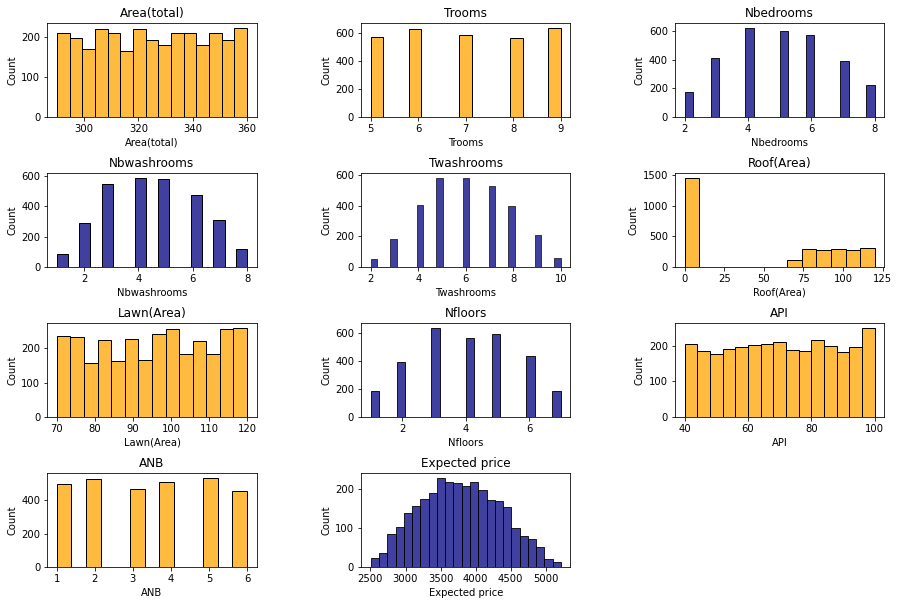

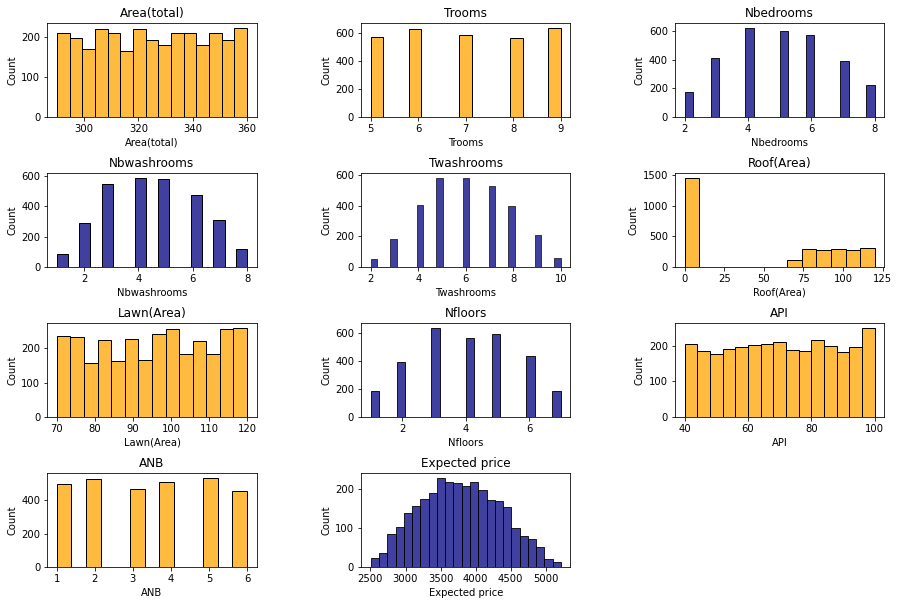

In [152]:
plt.figure(figsize =(15, 10))                           # Set Figure Sizes 
plt.subplots_adjust(wspace=0.5)                        # Adjust Spacing between the graphs 
plt.subplots_adjust(hspace=0.6)                        # Adject spacing between the two graphs 
plt.subplot(4,3,1)                                     # ploting subplots 
plt.title("Area(total)")                               # Set title
sb.histplot(df["Area(total)"],color="Orange")           # Creating histplot 

plt.subplot(4,3,2)
plt.title("Trooms")
sb.histplot(df["Trooms"],color="Orange")

plt.subplot(4,3,3)
plt.title("Nbedrooms")
sb.histplot(df["Nbedrooms"],color="navy")

plt.subplot(4,3,4)
plt.title("Nbwashrooms")
sb.histplot(df["Nbwashrooms"],color="navy")

plt.subplot(4,3,5)
plt.title("Twashrooms")
sb.histplot(df["Twashrooms"],color="navy")

plt.subplot(4,3,6)
plt.title("Roof(Area)")
sb.histplot(df["Roof(Area)"],color="Orange")

plt.subplot(4,3,7)
plt.title("Lawn(Area)")
sb.histplot(df["Lawn(Area)"],color="Orange")

plt.subplot(4,3,8)
plt.title("Nfloors")
sb.histplot(df["Nfloors"],color="navy")

plt.subplot(4,3,9)
plt.title("API")
sb.histplot(df["API"],color="Orange")

plt.subplot(4,3,10)
plt.title("ANB")
sb.histplot(df["ANB"],color="Orange")

plt.subplot(4,3,11)
plt.title("Expected price")
sb.histplot(df["Expected price"],color="navy")


plt.show()

## Interpretation-
   - The above graphs shows the distribution of different features.

## Checking Correlation --

In [153]:
correlation=df.corr()                                  # Finding correlation as a DataFrame 
correlation

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


## Heatmap--

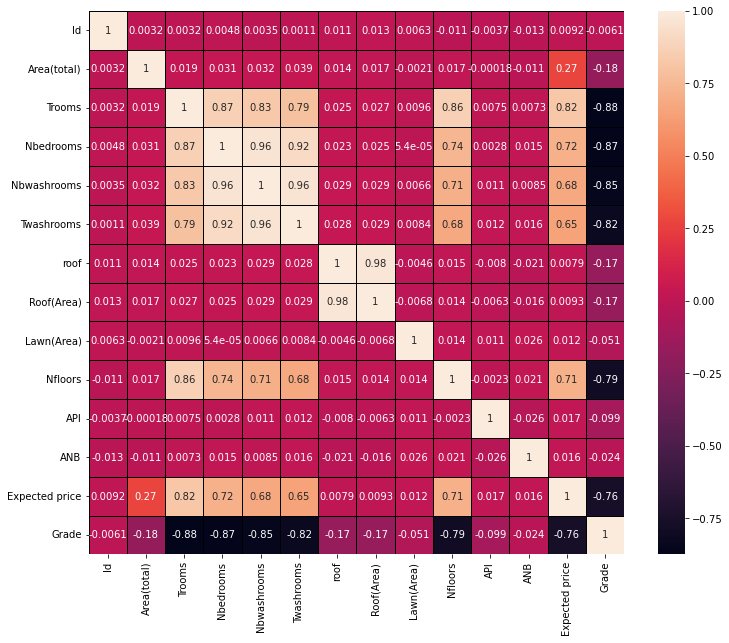

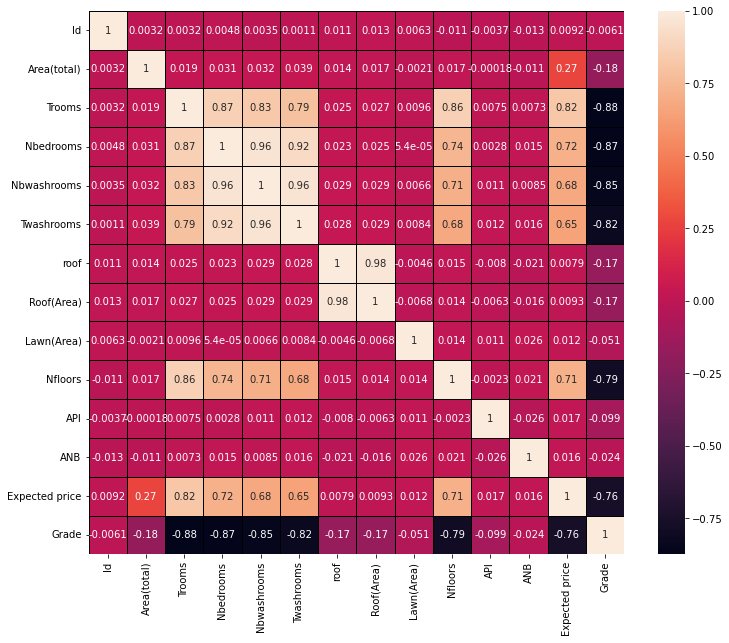

In [154]:
plt.figure(figsize=(12,10))                            # Setting figure size of heatmap
sb.heatmap(df.corr(),annot=True,fmt='.2g',linewidths=1,linecolor='Black')               # Ploting heatmap correlation 
plt.show()

In [155]:
abs(correlation["Grade"]).sort_values(ascending=False)

Grade             1.000000
Trooms            0.875145
Nbedrooms         0.865389
Nbwashrooms       0.847319
Twashrooms        0.819280
Nfloors           0.787623
Expected price    0.760820
Area(total)       0.177332
Roof(Area)        0.170259
roof              0.166635
API               0.099000
Lawn(Area)        0.051200
ANB               0.024025
Id                0.006074
Name: Grade, dtype: float64

Grade             1.000000
Trooms            0.875145
Nbedrooms         0.865389
Nbwashrooms       0.847319
Twashrooms        0.819280
Nfloors           0.787623
Expected price    0.760820
Area(total)       0.177332
Roof(Area)        0.170259
roof              0.166635
API               0.099000
Lawn(Area)        0.051200
ANB               0.024025
Id                0.006074
Name: Grade, dtype: float64

### <font color=dark>INTERPRETATION :
### <font color=magneta > Here we consider only top highly correlated Features .
### <font color=magneta > Grade,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price  

In [156]:
col=["Trooms","Nbedrooms","Nbwashrooms","Twashrooms","Nfloors","Expected price"] 

## Data Scaling Through MinMax Scaler --

In [157]:
df_scaled=pd.DataFrame(MinMaxScaler().fit_transform(df[col].to_numpy()),columns=col) # Scale the Data Through MinmAx Scaler 
df_scaled

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price
0,0.25,0.500000,0.428571,0.500,0.166667,0.360251
1,0.00,0.333333,0.285714,0.250,0.333333,0.370944
2,0.50,0.500000,0.428571,0.375,0.666667,0.458702
3,0.25,0.333333,0.285714,0.375,0.166667,0.232301
4,0.50,0.333333,0.428571,0.375,0.333333,0.493732
...,...,...,...,...,...,...
2995,1.00,0.666667,0.571429,0.625,0.666667,0.642330
2996,1.00,1.000000,0.857143,0.750,1.000000,0.460546
2997,0.50,0.333333,0.285714,0.375,0.666667,0.406711
2998,1.00,0.833333,0.857143,0.750,1.000000,0.624631


,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price
0,0.25,0.500000,0.428571,0.500,0.166667,0.360251
1,0.00,0.333333,0.285714,0.250,0.333333,0.370944
2,0.50,0.500000,0.428571,0.375,0.666667,0.458702
3,0.25,0.333333,0.285714,0.375,0.166667,0.232301
4,0.50,0.333333,0.428571,0.375,0.333333,0.493732
...,...,...,...,...,...,...
2995,1.00,0.666667,0.571429,0.625,0.666667,0.642330
2996,1.00,1.000000,0.857143,0.750,1.000000,0.460546
2997,0.50,0.333333,0.285714,0.375,0.666667,0.406711
2998,1.00,0.833333,0.857143,0.750,1.000000,0.624631


## Train test Spliting --

In [158]:
x =  np.array(df_scaled)
y =  np.array(df['Grade'])

In [159]:
x

array([[0.25      , 0.5       , 0.42857143, 0.5       , 0.16666667,
        0.36025074],
       [0.        , 0.33333333, 0.28571429, 0.25      , 0.33333333,
        0.37094395],
       [0.5       , 0.5       , 0.42857143, 0.375     , 0.66666667,
        0.45870206],
       ...,
       [0.5       , 0.33333333, 0.28571429, 0.375     , 0.66666667,
        0.40671091],
       [1.        , 0.83333333, 0.85714286, 0.75      , 1.        ,
        0.62463127],
       [0.5       , 0.66666667, 0.71428571, 0.75      , 0.66666667,
        0.59033923]])

array([[0.25      , 0.5       , 0.42857143, 0.5       , 0.16666667,
        0.36025074],
       [0.        , 0.33333333, 0.28571429, 0.25      , 0.33333333,
        0.37094395],
       [0.5       , 0.5       , 0.42857143, 0.375     , 0.66666667,
        0.45870206],
       ...,
       [0.5       , 0.33333333, 0.28571429, 0.375     , 0.66666667,
        0.40671091],
       [1.        , 0.83333333, 0.85714286, 0.75      , 1.        ,
        0.62463127],
       [0.5       , 0.66666667, 0.71428571, 0.75      , 0.66666667,
        0.59033923]])

In [160]:
y

array([3, 3, 2, ..., 3, 1, 2])

array([3, 3, 2, ..., 3, 1, 2])

In [161]:
Rkf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
for train_index, test_index in Rkf.split(x,y):
    x_train,x_test = x[train_index], x[test_index]
    y_train,y_test = y[train_index], y[test_index]

In [162]:
len(x_train),len(x_test),len(y_train),len(y_test)       # Check the length of the training and testing data 

(2000, 1000, 2000, 1000)

(2000, 1000, 2000, 1000)


## Modeling Through Gausian Naive Bayes  --

In [163]:
NBmodel=GaussianNB().fit(x_train,y_train)               # Create a Naive Bayes model and fitted the training data into it 

In [164]:
train_score=round(NBmodel.score(x_train,y_train)*100,2) # Finding the training score of the Naive Bayes model
print("Logistic Regression Training Score ", train_score,"%")

Logistic Regression Training Score  74.15 %
Logistic Regression Training Score  74.15 %


In [165]:
test_score=round(NBmodel.score(x_test,y_test)*100,2)    # Finding the testing score of the Naive Bayes model
print("Logistic Regression Test Score ", test_score,"%")

Logistic Regression Test Score  72.2 %
Logistic Regression Test Score  72.2 %


In [166]:
Y_predict_nb=NBmodel.predict(x_test)                    # Predict the future values of the sales 
Y_predict_nb[:100]

array([3, 2, 3, 1, 0, 1, 3, 4, 3, 1, 2, 3, 3, 4, 0, 1, 1, 4, 2, 0, 3, 0,
       2, 1, 2, 0, 3, 2, 3, 0, 3, 4, 3, 2, 3, 3, 0, 3, 3, 2, 4, 2, 3, 2,
       3, 2, 2, 3, 3, 3, 0, 4, 3, 3, 1, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 1,
       4, 3, 4, 4, 3, 2, 1, 2, 0, 4, 4, 2, 3, 3, 3, 4, 2, 3, 2, 2, 1, 0,
       3, 3, 1, 3, 0, 4, 2, 3, 2, 3, 1, 2])

array([3, 2, 3, 1, 0, 1, 3, 4, 3, 1, 2, 3, 3, 4, 0, 1, 1, 4, 2, 0, 3, 0,
       2, 1, 2, 0, 3, 2, 3, 0, 3, 4, 3, 2, 3, 3, 0, 3, 3, 2, 4, 2, 3, 2,
       3, 2, 2, 3, 3, 3, 0, 4, 3, 3, 1, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 1,
       4, 3, 4, 4, 3, 2, 1, 2, 0, 4, 4, 2, 3, 3, 3, 4, 2, 3, 2, 2, 1, 0,
       3, 3, 1, 3, 0, 4, 2, 3, 2, 3, 1, 2])

In [167]:
accuracy_score1=round(accuracy_score(y_test, Y_predict_nb)*100,2)
recall_score1=round(recall_score(y_test, Y_predict_nb, average='weighted')*100,2)
f1_score1=round(f1_score(y_test, Y_predict_nb, average='weighted')*100,2)
precision_score1=round(precision_score(y_test, Y_predict_nb,average='weighted')*100,2)

In [168]:
print('accuracy:', accuracy_score1,"%")
print('recall:', recall_score1,"%")
print('f1-score:', f1_score1,"%")
print('precision:', precision_score1,"%")

accuracy: 72.2 %
recall: 72.2 %
f1-score: 73.78 %
precision: 77.75 %
accuracy: 72.2 %
recall: 72.2 %
f1-score: 73.78 %
precision: 77.75 %


In [169]:
NB_con_matrix=confusion_matrix(y_test,Y_predict_nb)
NB_con_matrix

array([[118,  15,   0,   0,   0],
       [ 16, 144,  19,   0,   0],
       [  0,  47, 165,  27,   0],
       [  0,   0,  71, 277,  75],
       [  0,   0,   0,   8,  18]], dtype=int64)

array([[118,  15,   0,   0,   0],
       [ 16, 144,  19,   0,   0],
       [  0,  47, 165,  27,   0],
       [  0,   0,  71, 277,  75],
       [  0,   0,   0,   8,  18]], dtype=int64)

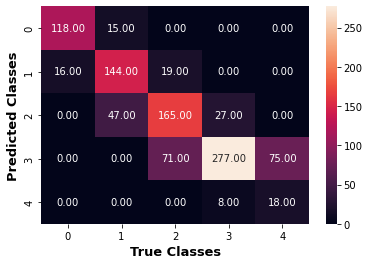

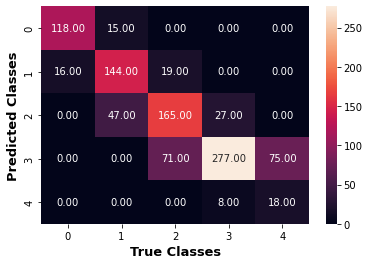

In [170]:
sb.heatmap(NB_con_matrix,annot=True, fmt='.2f')
plt.xlabel("True Classes",fontsize=13,fontweight="bold")
plt.ylabel("Predicted Classes",fontsize=13,fontweight="bold")
plt.show()

## Modeling Through Decision Tree Classifier --

In [171]:
Decision_tree_model = DecisionTreeClassifier(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
Decision_tree_model.fit(x_train,y_train)               # Create the Decision Tree model and fitted the training data into it

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [172]:
DT_Training_Score=round(Decision_tree_model.score(x_train,y_train)*100,2) 
print("Decision Tree Training Score ", DT_Training_Score,"%") # Finding the training score of the  Decision Tree model

Decision Tree Training Score  77.15 %
Decision Tree Training Score  77.15 %


In [173]:
DT_Testing_Score=round(Decision_tree_model.score(x_test,y_test)*100,2)      
print("Decision Tree Test Score ", DT_Testing_Score,"%")      # Finding the testing score of the  Decision Tree model

Decision Tree Test Score  74.9 %
Decision Tree Test Score  74.9 %


In [174]:
Y_predict_DT=Decision_tree_model.predict(x_test)             
Y_predict_DT  [:100]                                          # Finding Cofficient intercept and slope of the  Decision Tree model

array([3, 2, 3, 1, 0, 2, 3, 3, 3, 1, 2, 3, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0,
       2, 1, 2, 1, 3, 2, 2, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 3, 2, 3, 0, 3, 3, 2, 1, 0, 2, 3, 3, 3, 0, 3, 0, 3, 2, 1,
       3, 2, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 1, 1,
       3, 3, 2, 2, 0, 3, 2, 3, 2, 3, 1, 3])

array([3, 2, 3, 1, 0, 2, 3, 3, 3, 1, 2, 3, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0,
       2, 1, 2, 1, 3, 2, 2, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 3, 2, 3, 0, 3, 3, 2, 1, 0, 2, 3, 3, 3, 0, 3, 0, 3, 2, 1,
       3, 2, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 1, 1,
       3, 3, 2, 2, 0, 3, 2, 3, 2, 3, 1, 3])

In [175]:
accuracy_score2=round(accuracy_score(y_test, Y_predict_DT)*100,2)
recall_score2=round(recall_score(y_test, Y_predict_DT, average='weighted')*100,2)
f1_score2=round(f1_score(y_test, Y_predict_DT, average='weighted')*100,2)
precision_score2=round(precision_score(y_test, Y_predict_DT,average='weighted')*100,2)

In [176]:
print('accuracy:', accuracy_score2,"%")
print('recall:', recall_score2,"%")
print('f1-score:', f1_score2,"%")
print('precision:', precision_score2,"%")

accuracy: 74.9 %
recall: 74.9 %
f1-score: 74.44 %
precision: 75.41 %
accuracy: 74.9 %
recall: 74.9 %
f1-score: 74.44 %
precision: 75.41 %


In [177]:
DT_con_matrix=confusion_matrix(y_test,Y_predict_DT)
DT_con_matrix

array([[108,  25,   0,   0,   0],
       [  9, 113,  57,   0,   0],
       [  0,  12, 195,  32,   0],
       [  0,   0,  90, 333,   0],
       [  0,   0,   0,  26,   0]], dtype=int64)

array([[108,  25,   0,   0,   0],
       [  9, 113,  57,   0,   0],
       [  0,  12, 195,  32,   0],
       [  0,   0,  90, 333,   0],
       [  0,   0,   0,  26,   0]], dtype=int64)

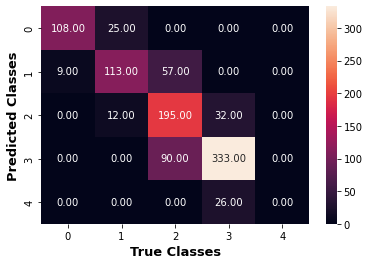

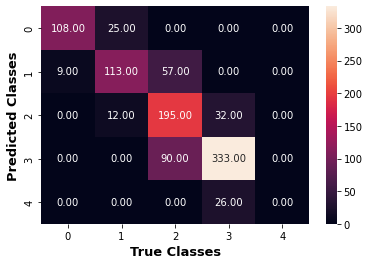

In [178]:
sb.heatmap(DT_con_matrix,annot=True, fmt='.2f')
plt.xlabel("True Classes",fontsize=13,fontweight="bold")
plt.ylabel("Predicted Classes",fontsize=13,fontweight="bold")
plt.show()

## Modeling Through Random Forest Regressor --

In [179]:
Random_f_model = RandomForestClassifier(random_state=25, n_jobs=-1, max_depth=5, n_estimators=100,oob_score=True)
Random_f_model.fit(x_train, y_train)                   # Create a Linear model and fitted the training data into it 

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=25)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=25)

In [180]:
Random_f_pred = Random_f_model.predict(x_test)         # Predict the future values of the sales 
Random_f_pred[:100]

array([3, 2, 3, 1, 0, 1, 3, 3, 3, 1, 2, 3, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0,
       2, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 3, 2,
       3, 2, 2, 3, 3, 3, 0, 3, 3, 3, 1, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1,
       3, 3, 1, 3, 0, 3, 2, 3, 2, 3, 1, 3])

array([3, 2, 3, 1, 0, 1, 3, 3, 3, 1, 2, 3, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0,
       2, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 3, 2,
       3, 2, 2, 3, 3, 3, 0, 3, 3, 3, 1, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1,
       3, 3, 1, 3, 0, 3, 2, 3, 2, 3, 1, 3])

In [181]:
Train_score_RF = round(Random_f_model.score(x_train, y_train)*100,2)
print("Train score:",Train_score_RF,"%") 

Train score: 81.15 %
Train score: 81.15 %


In [182]:
Test_score_RF= round(Random_f_model.score(x_test, y_test)*100,2) 
print("Test score:",Test_score_RF,"%")  

Test score: 79.5 %
Test score: 79.5 %


In [183]:
accuracy_score3=round(accuracy_score(y_test, Random_f_pred)*100,2)
recall_score3=round(recall_score(y_test, Random_f_pred, average='weighted')*100,2)
f1_score3=round(f1_score(y_test, Random_f_pred, average='weighted')*100,2)
precision_score3=round(precision_score(y_test, Random_f_pred,average='weighted')*100,2)

In [184]:
print('accuracy:', accuracy_score3,"%")
print('recall:', recall_score3,"%")
print('f1-score:', f1_score3,"%")
print('precision:', precision_score3,"%")

accuracy: 79.5 %
recall: 79.5 %
f1-score: 78.39 %
precision: 77.48 %
accuracy: 79.5 %
recall: 79.5 %
f1-score: 78.39 %
precision: 77.48 %


In [185]:
RF_con_matrix=confusion_matrix(y_test,Random_f_pred)
RF_con_matrix

array([[112,  21,   0,   0,   0],
       [  8, 140,  31,   0,   0],
       [  0,  26, 162,  51,   0],
       [  0,   0,  42, 381,   0],
       [  0,   0,   0,  26,   0]], dtype=int64)

array([[112,  21,   0,   0,   0],
       [  8, 140,  31,   0,   0],
       [  0,  26, 162,  51,   0],
       [  0,   0,  42, 381,   0],
       [  0,   0,   0,  26,   0]], dtype=int64)

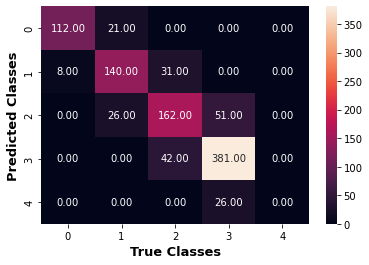

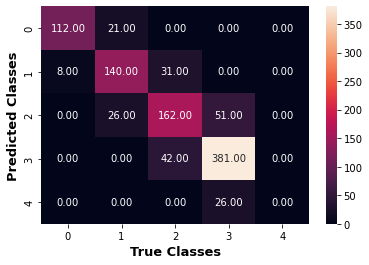

In [186]:
sb.heatmap(RF_con_matrix,annot=True, fmt='.2f')
plt.xlabel("True Classes",fontsize=13,fontweight="bold")
plt.ylabel("Predicted Classes",fontsize=13,fontweight="bold")
plt.show()

## Modeling Through KNN Classifier Regressor --

In [187]:
k=5
knn= neighbors.KNeighborsClassifier(k)              # Creting the KNN Classifier model
knn.fit(x_train,y_train)

KNeighborsClassifier()

KNeighborsClassifier()

In [188]:
print(knn.classes_)

[0 1 2 3 4]
[0 1 2 3 4]


In [189]:
knn_y_predict=knn.predict(x_test)                   # Predict the data
knn_y_predict[:100]

array([3, 2, 3, 1, 0, 1, 3, 3, 3, 1, 2, 3, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0,
       2, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 3, 3, 3, 0, 3, 3, 3, 1, 0, 2, 3, 2, 3, 0, 3, 0, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 1, 1,
       3, 3, 1, 3, 0, 3, 2, 3, 3, 3, 1, 3])

array([3, 2, 3, 1, 0, 1, 3, 3, 3, 1, 2, 3, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0,
       2, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 3, 3, 3, 0, 3, 3, 3, 1, 0, 2, 3, 2, 3, 0, 3, 0, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 1, 1,
       3, 3, 1, 3, 0, 3, 2, 3, 3, 3, 1, 3])

In [190]:
KNN_Training_Score=round(knn.score(x_train,y_train)*100,2) 
print("KNN  Training Score ", KNN_Training_Score,"%") # Finding the training score of the  Decision Tree model


KNN  Training Score  83.65 %
KNN  Training Score  83.65 %


In [191]:
KNN_Testing_Score=round(knn.score(x_test,y_test)*100,2) 
print("KNN Testing Score ", KNN_Testing_Score,"%") # Finding the training score of the  Decision Tree model

KNN Testing Score  77.8 %
KNN Testing Score  77.8 %


In [192]:
accuracy_score4=round(accuracy_score(y_test, knn_y_predict)*100,2)
recall_score4=round(recall_score(y_test, knn_y_predict, average='weighted')*100,2)
f1_score4=round(f1_score(y_test, knn_y_predict, average='weighted')*100,2)
precision_score4=round(precision_score(y_test, knn_y_predict,average='weighted')*100,2)

In [193]:
print('accuracy:', accuracy_score4,"%")
print('recall:', recall_score4,"%")
print('f1-score:', f1_score4,"%")
print('precision:', precision_score4,"%")

accuracy: 77.8 %
recall: 77.8 %
f1-score: 76.96 %
precision: 76.19 %
accuracy: 77.8 %
recall: 77.8 %
f1-score: 76.96 %
precision: 76.19 %


In [194]:
knn_con_matrix=confusion_matrix(y_test,knn_y_predict)
knn_con_matrix

array([[113,  20,   0,   0,   0],
       [ 11, 134,  34,   0,   0],
       [  0,  28, 162,  49,   0],
       [  0,   0,  50, 369,   4],
       [  0,   0,   0,  26,   0]], dtype=int64)

array([[113,  20,   0,   0,   0],
       [ 11, 134,  34,   0,   0],
       [  0,  28, 162,  49,   0],
       [  0,   0,  50, 369,   4],
       [  0,   0,   0,  26,   0]], dtype=int64)

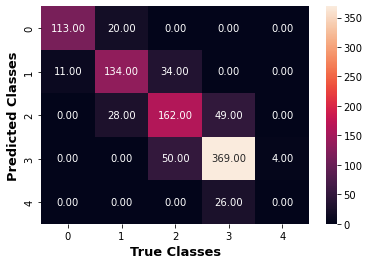

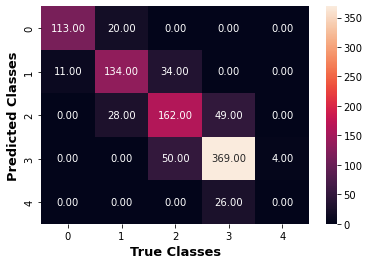

In [195]:
sb.heatmap(knn_con_matrix,annot=True, fmt='.2f')
plt.xlabel("True Classes",fontsize=13,fontweight="bold")
plt.ylabel("Predicted Classes",fontsize=13,fontweight="bold")
plt.show()

# <font color=indigo>  <center> <u>Final DataFrame

In [196]:
Training_score=[train_score,DT_Training_Score,Train_score_RF,KNN_Training_Score]
Testing_score=[test_score,DT_Testing_Score,Test_score_RF,KNN_Testing_Score]
Accuracy=[accuracy_score1,accuracy_score2,accuracy_score3,accuracy_score4]
Recall=[recall_score1,recall_score2,recall_score3,recall_score4]
f1_score=[f1_score1,f1_score2,f1_score3,f1_score4]
precision=[precision_score1,precision_score2,precision_score3,precision_score4]
INDEX=["NAIVE BAYES","DECISION TREE","RANDOM FOREST","KNN"]
final_df=pd.DataFrame({"Training score":Training_score,"Testing score":Testing_score,"Recall":Recall,"Accuracy":Accuracy,"f1-score":f1_score,"precision":precision},index=INDEX)
final_df

,Training score,Testing score,Recall,Accuracy,f1-score,precision
NAIVE BAYES,74.15,72.2,72.2,72.2,73.78,77.75
DECISION TREE,77.15,74.9,74.9,74.9,74.44,75.41
RANDOM FOREST,81.15,79.5,79.5,79.5,78.39,77.48
KNN,83.65,77.8,77.8,77.8,76.96,76.19


,Training score,Testing score,Recall,Accuracy,f1-score,precision
NAIVE BAYES,74.15,72.2,72.2,72.2,73.78,77.75
DECISION TREE,77.15,74.9,74.9,74.9,74.44,75.41
RANDOM FOREST,81.15,79.5,79.5,79.5,78.39,77.48
KNN,83.65,77.8,77.8,77.8,76.96,76.19


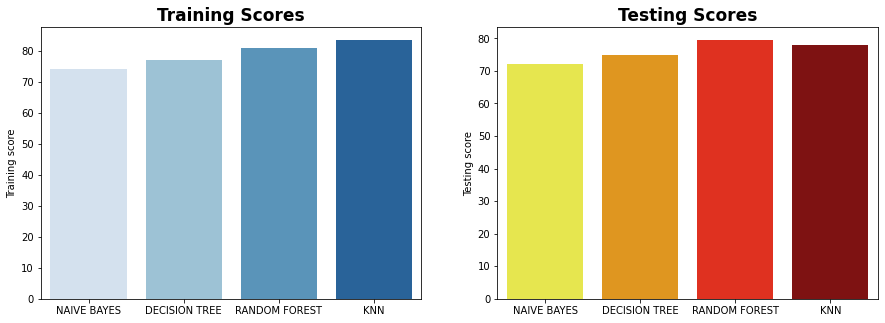

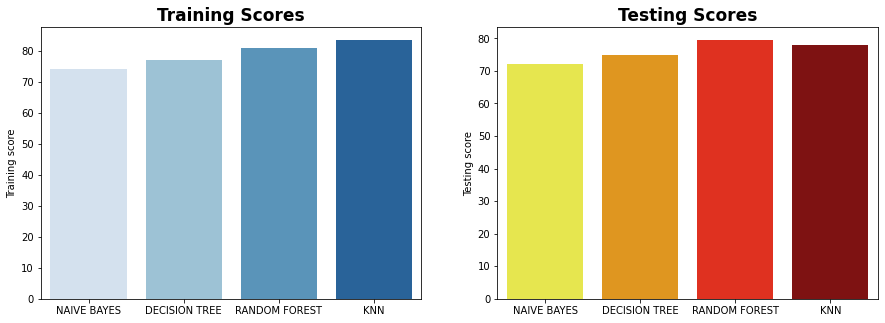

In [197]:
plt.figure(figsize =(15, 5))
plt.subplot(1,2,1)
sb.barplot(final_df.index,final_df["Training score"],palette="Blues")
plt.title("Training Scores",fontsize=17,fontweight="bold")
plt.subplot(1,2,2)
sb.barplot(final_df.index,final_df["Testing score"],palette="hot_r")
plt.title("Testing Scores",fontsize=17,fontweight="bold")
plt.show()

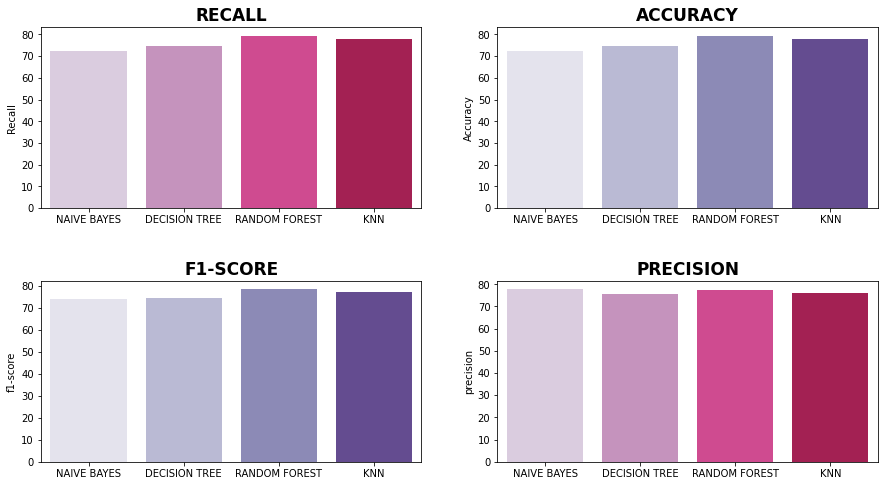

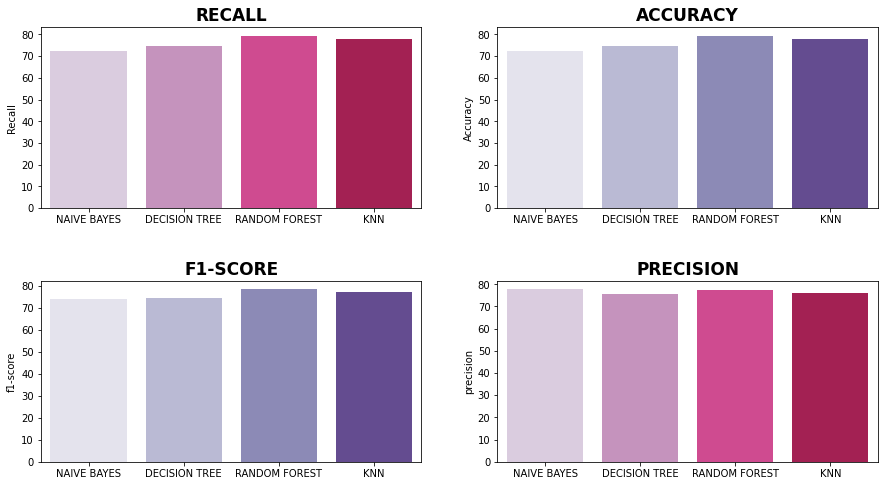

In [198]:
plt.figure(figsize =(15, 8))
plt.subplots_adjust(hspace=0.4)  
plt.subplot(2,2,1)
sb.barplot(final_df.index,final_df["Recall"],palette="PuRd")
plt.title("RECALL",fontsize=17,fontweight="bold")
plt.subplot(2,2,2)
sb.barplot(final_df.index,final_df["Accuracy"],palette="Purples")
plt.title("ACCURACY",fontsize=17,fontweight="bold")
plt.subplot(2,2,3)
sb.barplot(final_df.index,final_df["f1-score"],palette="Purples")
plt.title("F1-SCORE",fontsize=17,fontweight="bold")
plt.subplot(2,2,4)
sb.barplot(final_df.index,final_df["precision"],palette="PuRd")
plt.title("PRECISION",fontsize=17,fontweight="bold")
plt.show()

# <font color=crimson > <u> Final Interpretation

### <font color=green >The graphical representation shows that __Random Forest Classifier__ gives the best score for accuracy,recall,precision and F1-score.Also random forest model handles outliers well so it is best in case of outlier presence.
### <font color=green >As random forest classifier is a combination of many decision trees and it uses the average of accuracy,recall,precision and F1-score it improves the performance and avoid over fitting of the model.